<h1 align="center">
  <img src="https://readme-typing-svg.herokuapp.com?font=Fira+Code&size=26&duration=3000&pause=1000&color=3BA9F0&center=true&vCenter=true&width=800&lines=🔍+Customer+Churn+Prediction+Model;Built+by+Nabil+Sherif+Nabil+Ibrahim+Darwish" alt="Typing SVG" />
</h1>

<p align="center">
  <img src="https://img.shields.io/badge/Project-Customer%20Churn-blueviolet?style=for-the-badge&logo=databricks&logoColor=white">
  <img src="https://img.shields.io/badge/ML-scikit--learn-teal?style=for-the-badge&logo=scikit-learn&logoColor=white">
  <img src="https://img.shields.io/badge/Data-Cleansing%2C%20Preprocessing-lightgrey?style=for-the-badge&logo=pandas&logoColor=black">
  <img src="https://img.shields.io/badge/Notebook-Google%20Colab-yellow?style=for-the-badge&logo=googlecolab&logoColor=black">
</p>

---

<p align="center" style="font-style: italic; font-size: 22px; font-weight: bold;">
  “Every churned customer tells a story. Data helps us rewrite the ending.”
</p>

---


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# **Reading the Data**

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns = df.columns.str.strip()
df.head(5)

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **1. Initial Data Checks**

In [ ]:
df.shape

(7043, 21)

In [ ]:
# Confirming that there are no missing values
print("Missing values per column: ")
print(df.isnull().sum())

# Confirming data types
print("\nData types: ")
print(df.dtypes)

Missing values per column: 
customerID           0
gender               0
Senior_Citizen       0
Is_Married           0
Dependents           0
tenure               0
Phone_Service        0
Dual                 0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn                0
dtype: int64

Data types: 
customerID            object
gender                object
Senior_Citizen         int64
Is_Married            object
Dependents            object
tenure                 int64
Phone_Service         object
Dual                  object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              objec

In [ ]:
df.columns = [
    'customer_id', 'gender', 'senior_citizen', 'is_married', 'dependents',
    'tenure', 'phone_service', 'dual', 'internet_service', 'online_security',
    'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
    'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
    'monthly_charges', 'total_charges', 'churn'
]

df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'is_married', 'dependents',
       'tenure', 'phone_service', 'dual', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

### Problem with Total_Charges data type:

The `Total_Charges` column was read as an object (string) instead of a numeric type due to blank or non-numeric values, mostly from customers with `tenure = 0`.

### Solution:

* Replaced blank values with `NaN`.
* Converted `Total_Charges` to numeric using `pd.to_numeric()`.
* Dropped rows with missing values in `Total_Charges`.
* Confirmed the column is now of type `float`.

This ensures `Total_Charges` can be used for analysis and modeling.


In [ ]:
# Replacing blank strings with NaN
df.replace(" ", pd.NA, inplace=True)

# Now we convert 'Total_Charges' to numeric values, setting errors to NaN
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [ ]:
# Confirming that there are no missing values
print("Missing values per column: ")
print(df.isnull().sum())

# Confirming data types
print("\nData types: ")
print(df.dtypes)

Missing values per column: 
customer_id           0
gender                0
senior_citizen        0
is_married            0
dependents            0
tenure                0
phone_service         0
dual                  0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

Data types: 
customer_id           object
gender                object
senior_citizen         int64
is_married            object
dependents            object
tenure                 int64
phone_service         object
dual                  object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contra

In [ ]:
missing_total_charges = df[df['total_charges'].isna()]

# Displaying customerID and tenure for those rows
print(missing_total_charges[['customer_id', 'tenure']])

# Checking if all missing Total_Charges have tenure = 0
print("Unique tenure values where Total_Charges is missing:", missing_total_charges['tenure'].unique())

     customer_id  tenure
488   4472-LVYGI       0
753   3115-CZMZD       0
936   5709-LVOEQ       0
1082  4367-NUYAO       0
1340  1371-DWPAZ       0
3331  7644-OMVMY       0
3826  3213-VVOLG       0
4380  2520-SGTTA       0
5218  2923-ARZLG       0
6670  4075-WKNIU       0
6754  2775-SEFEE       0
Unique tenure values where Total_Charges is missing: [0]


### Missing Values in `Total_Charges`

* A total of 11 rows have missing values in the `Total_Charges` column.
* All these rows correspond to customers with `tenure = 0`.
* This indicates that these customers have just joined and have no accumulated charges yet.
* **Imputation strategy:** Since these customers have zero tenure, it is logical to impute the missing `Total_Charges` values with **0**.

In [ ]:
# Imputing the missing Total_Charges with 0
df['total_charges'] = df['total_charges'].fillna(0)

In [ ]:
# Confirming that there are no missing values
print("Missing values per column: ")
print(df.isnull().sum())

# Confirming data types
print("\nData types: ")
print(df.dtypes)

Missing values per column: 
customer_id          0
gender               0
senior_citizen       0
is_married           0
dependents           0
tenure               0
phone_service        0
dual                 0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

Data types: 
customer_id           object
gender                object
senior_citizen         int64
is_married            object
dependents            object
tenure                 int64
phone_service         object
dual                  object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              objec

# **2. Descriptive Statistics**

In [ ]:
numerical_features = ['tenure', 'monthly_charges', 'total_charges']
desc_stats = df[numerical_features].describe()

desc_stats

,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Key Insights:

* **Tenure:** The average customer has been with the company for about 32 months, but there is a wide range, from brand-new customers (0 months) to those who have stayed for up to 6 years (72 months). The spread indicates diverse customer loyalty levels.
* **Monthly Charges:** On average, customers pay approximately \$65 per month, with significant variation. While some pay as low as \$18, others pay nearly \$119, likely reflecting differences in service plans or add-ons.
* **Total Charges:** This variable shows a large spread with an average total charge of about \$2,280. The wide range (from \$0 to over \$8,600) corresponds with varying tenures and monthly charges. Notably, the \$0 minimum indicates new customers who haven't accumulated charges yet.

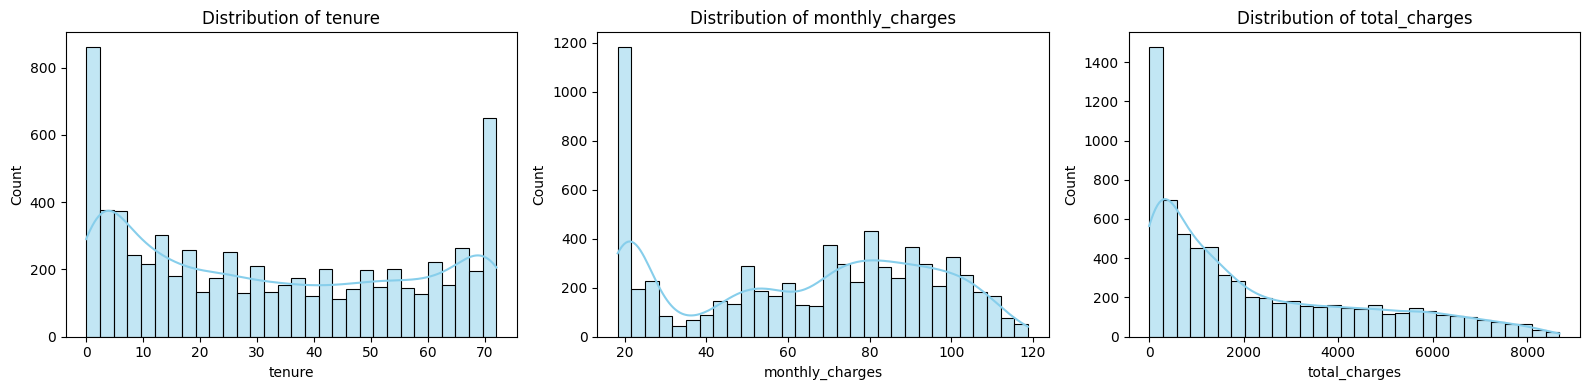

In [ ]:
plt.figure(figsize=(16, 4))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

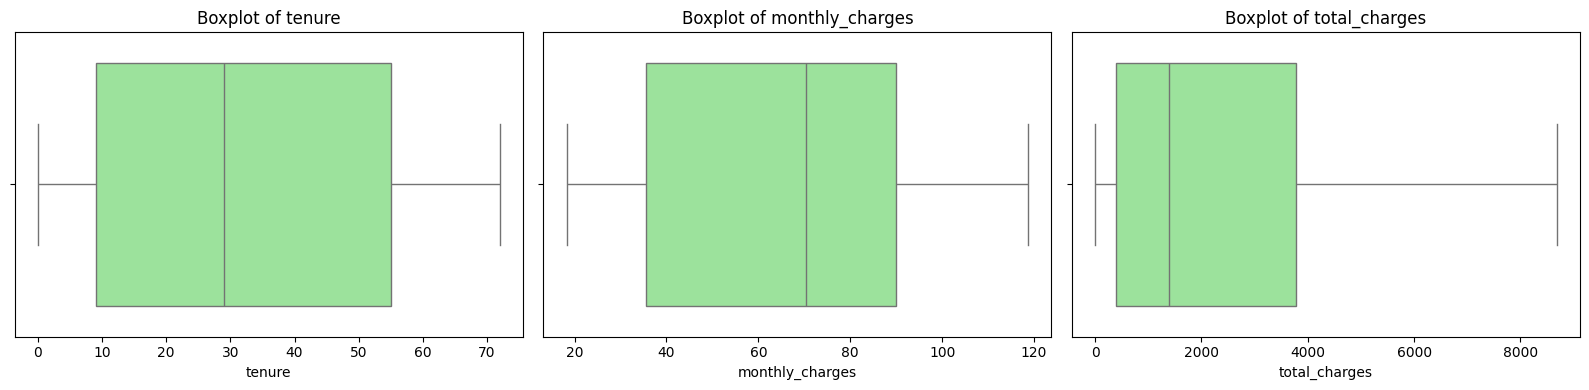

In [ ]:
plt.figure(figsize=(16, 4))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

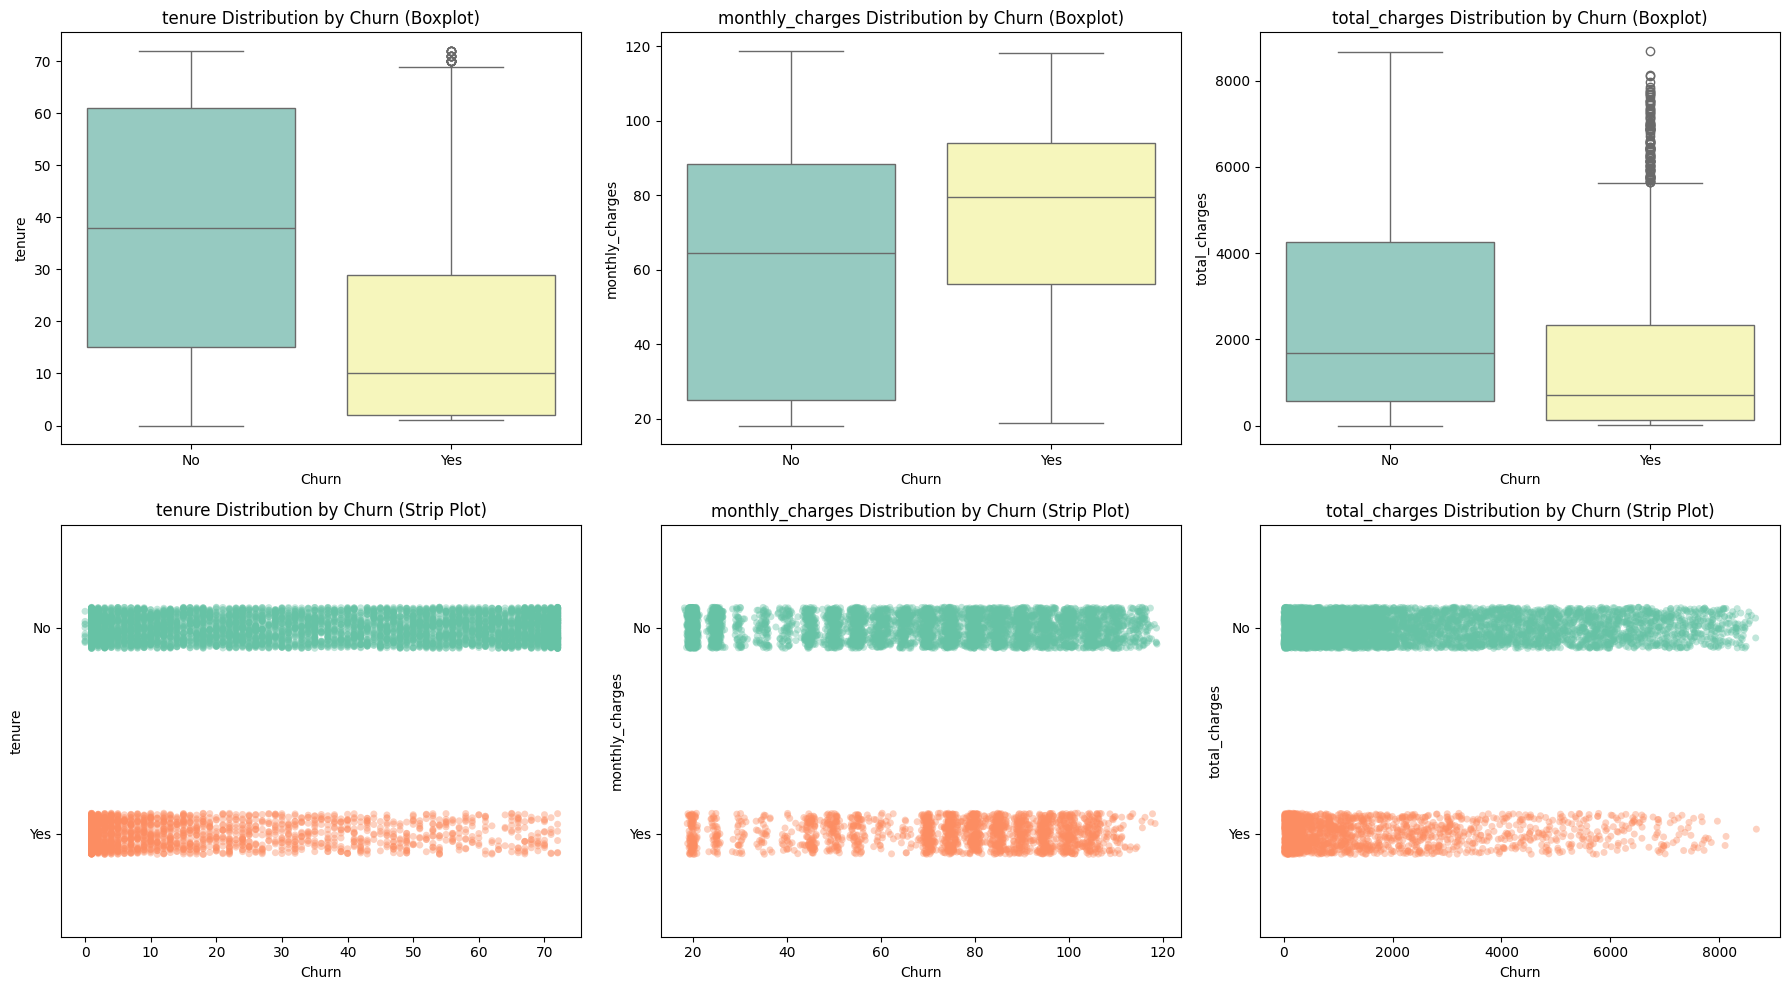

In [ ]:
plt.figure(figsize=(18, 10))

# Boxplots (top row)
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} Distribution by Churn (Boxplot)')
    plt.xlabel('Churn')
    plt.ylabel(feature)

# Scatter plots (bottom row)
for i, feature in enumerate(numerical_features, 4):
    plt.subplot(2, 3, i)
    sns.stripplot(x=feature, y='churn', data=df, jitter=True, alpha=0.4, palette='Set2')
    plt.title(f'{feature} Distribution by Churn (Strip Plot)')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Total_Charges Skewness and Fix

* The **Total\_Charges** feature is **right skewed**, with a few customers having very high total charges compared to most.
* This skewness can distort modeling and statistical analyses.
* To address this, we will try multiple transformations including **log**, **square root**, and **Box-Cox** to find the best way to reduce skewness and normalize the distribution.

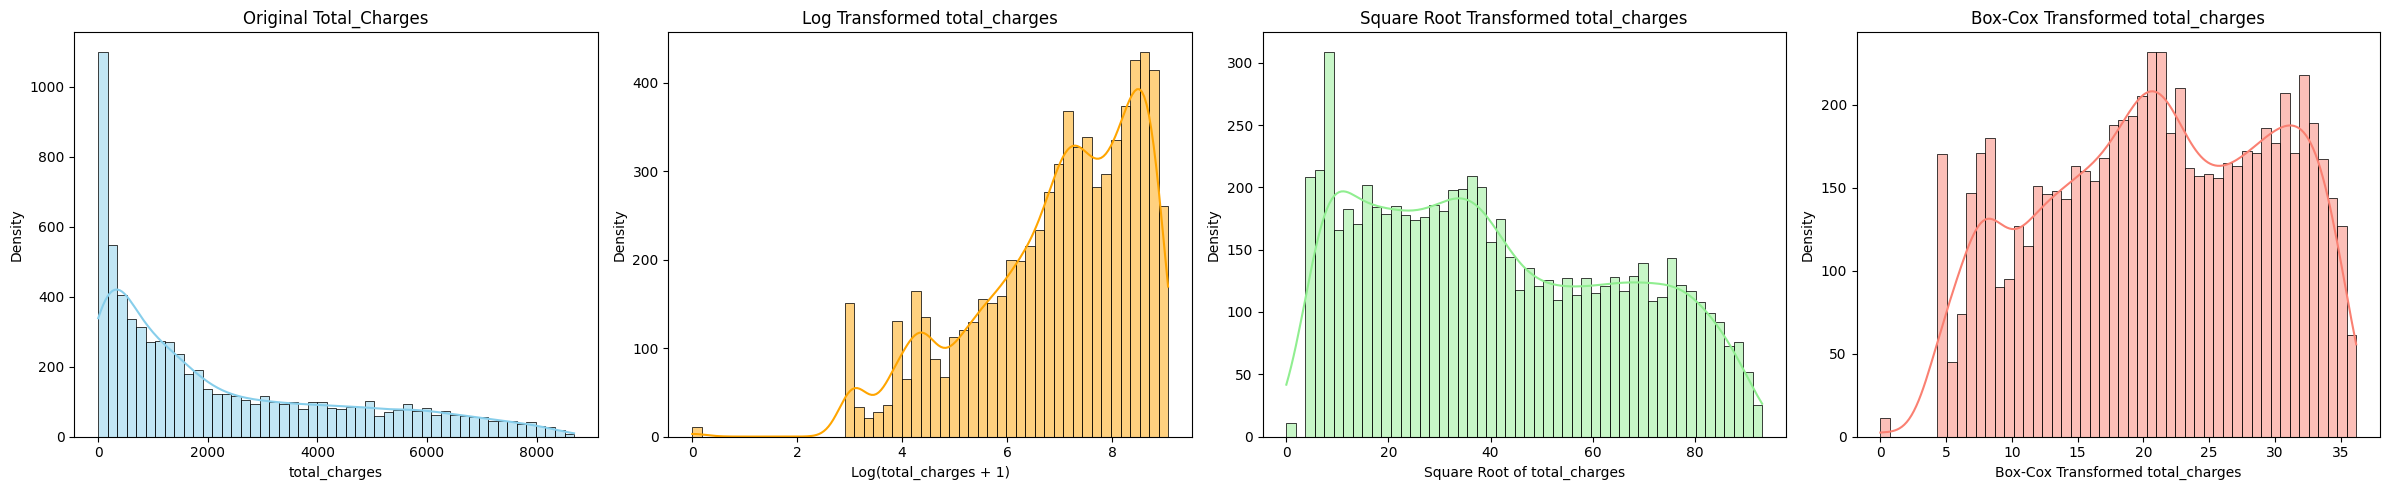

In [ ]:
plt.figure(figsize=(24,5))

# Original Total_Charges
plt.subplot(1, 4, 1)
sns.histplot(df['total_charges'], bins=50, kde=True, color='skyblue')
plt.title('Original Total_Charges')
plt.xlabel('total_charges')
plt.ylabel('Density')

# Log transform (add 1 to avoid log(0))
log_transform = np.log(df['total_charges'] + 1)
plt.subplot(1, 4, 2)
sns.histplot(log_transform, bins=50, kde=True, color='orange')
plt.title('Log Transformed total_charges')
plt.xlabel('Log(total_charges + 1)')
plt.ylabel('Density')

# Square root transform
sqrt_transform = np.sqrt(df['total_charges'])
plt.subplot(1, 4, 3)
sns.histplot(sqrt_transform, bins=50, kde=True, color='lightgreen')
plt.title('Square Root Transformed total_charges')
plt.xlabel('Square Root of total_charges')
plt.ylabel('Density')

# Box-Cox transform (add 1 to avoid zeros)
boxcox_transform, _ = stats.boxcox(df['total_charges'] + 1)
plt.subplot(1, 4, 4)
sns.histplot(boxcox_transform, bins=50, kde=True, color='salmon')
plt.title('Box-Cox Transformed total_charges')
plt.xlabel('Box-Cox Transformed total_charges')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Choosing Box-Cox Transformation for Total_Charges

* After comparing multiple transformations (log, square root, and Box-Cox), the **Box-Cox transformation** was selected as the best method to reduce right skewness in the `Total_Charges` feature.
* The Box-Cox transform produced the most symmetric distribution, making the data better suited for modeling and analysis.

In [ ]:
# Applying Box-Cox transformation (adding 1 to avoid zeros)
df['total_charges'], _ = stats.boxcox(df['total_charges'] + 1)

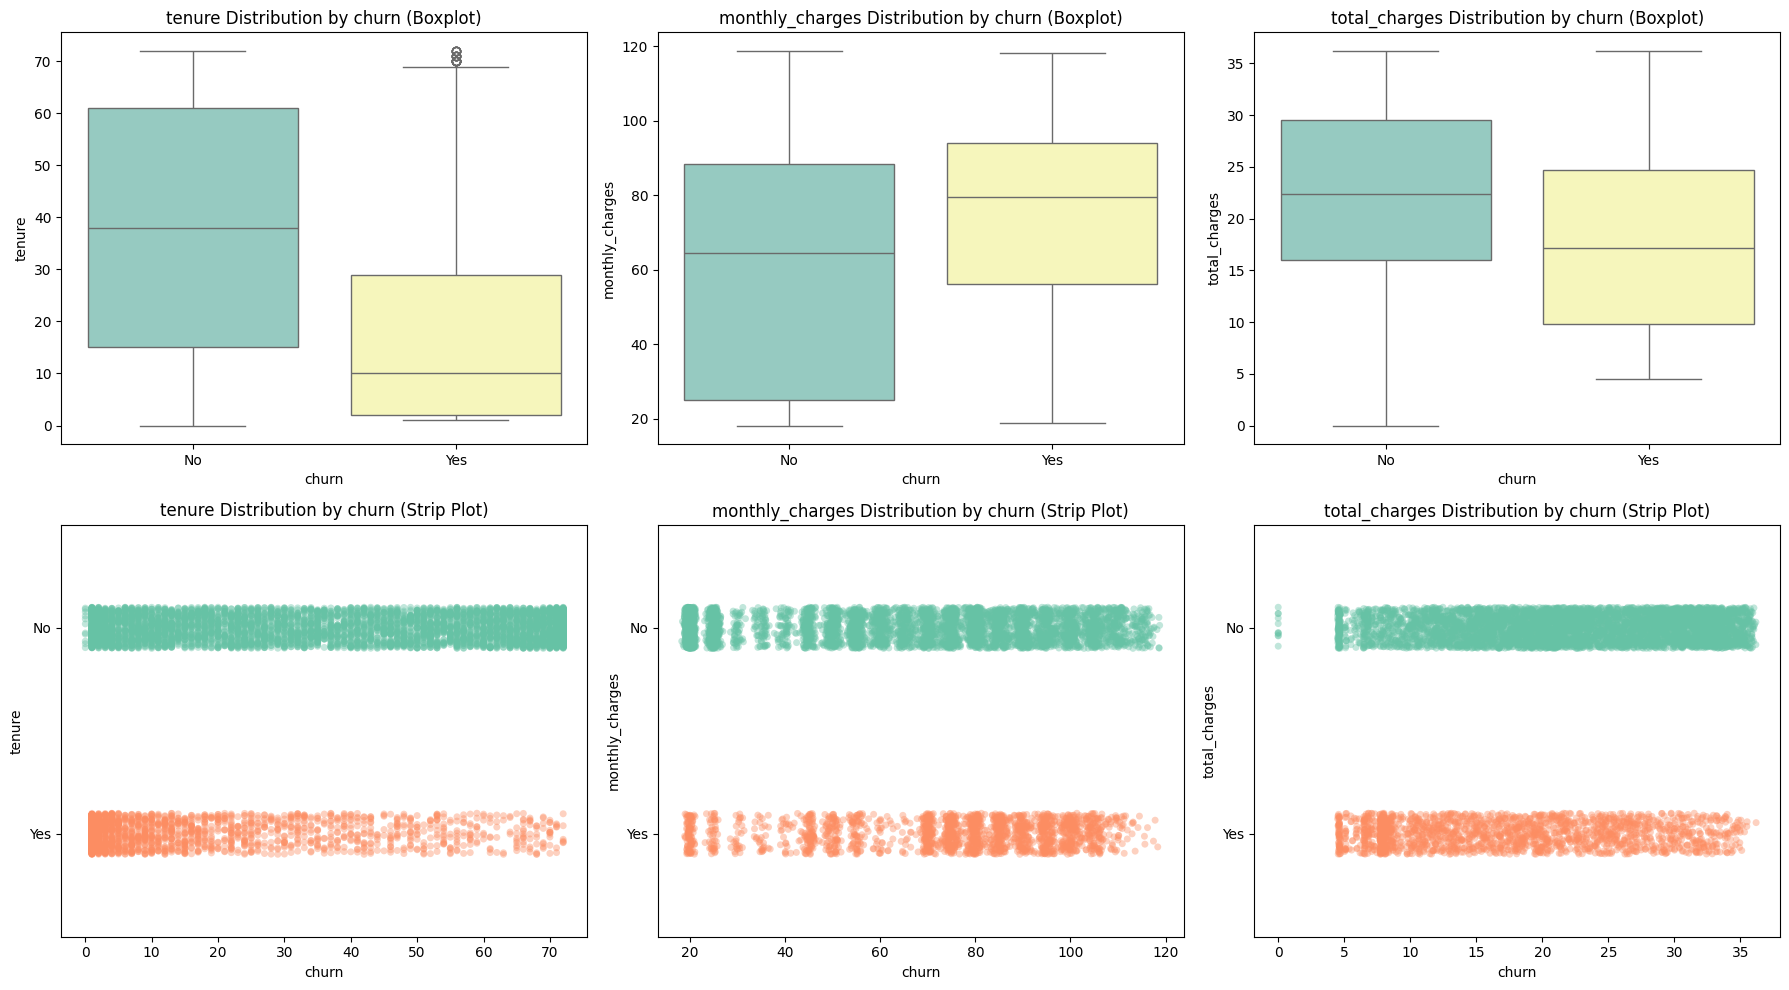

In [ ]:
plt.figure(figsize=(18, 10))

# Boxplots (top row)
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} Distribution by churn (Boxplot)')
    plt.xlabel('churn')
    plt.ylabel(feature)

# Scatter plots (bottom row)
for i, feature in enumerate(numerical_features, 4):
    plt.subplot(2, 3, i)
    sns.stripplot(x=feature, y='churn', data=df, jitter=True, alpha=0.4, palette='Set2')
    plt.title(f'{feature} Distribution by churn (Strip Plot)')
    plt.xlabel('churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# **3. Churn Analysis**

In [ ]:
df['senior_citizen'] = df['senior_citizen'].map({0: 'No', 1: 'Yes'})

In [ ]:
df.dtypes

,0
customer_id,object
gender,object
senior_citizen,object
is_married,object
dependents,object
tenure,int64
phone_service,object
dual,object
internet_service,object
online_security,object


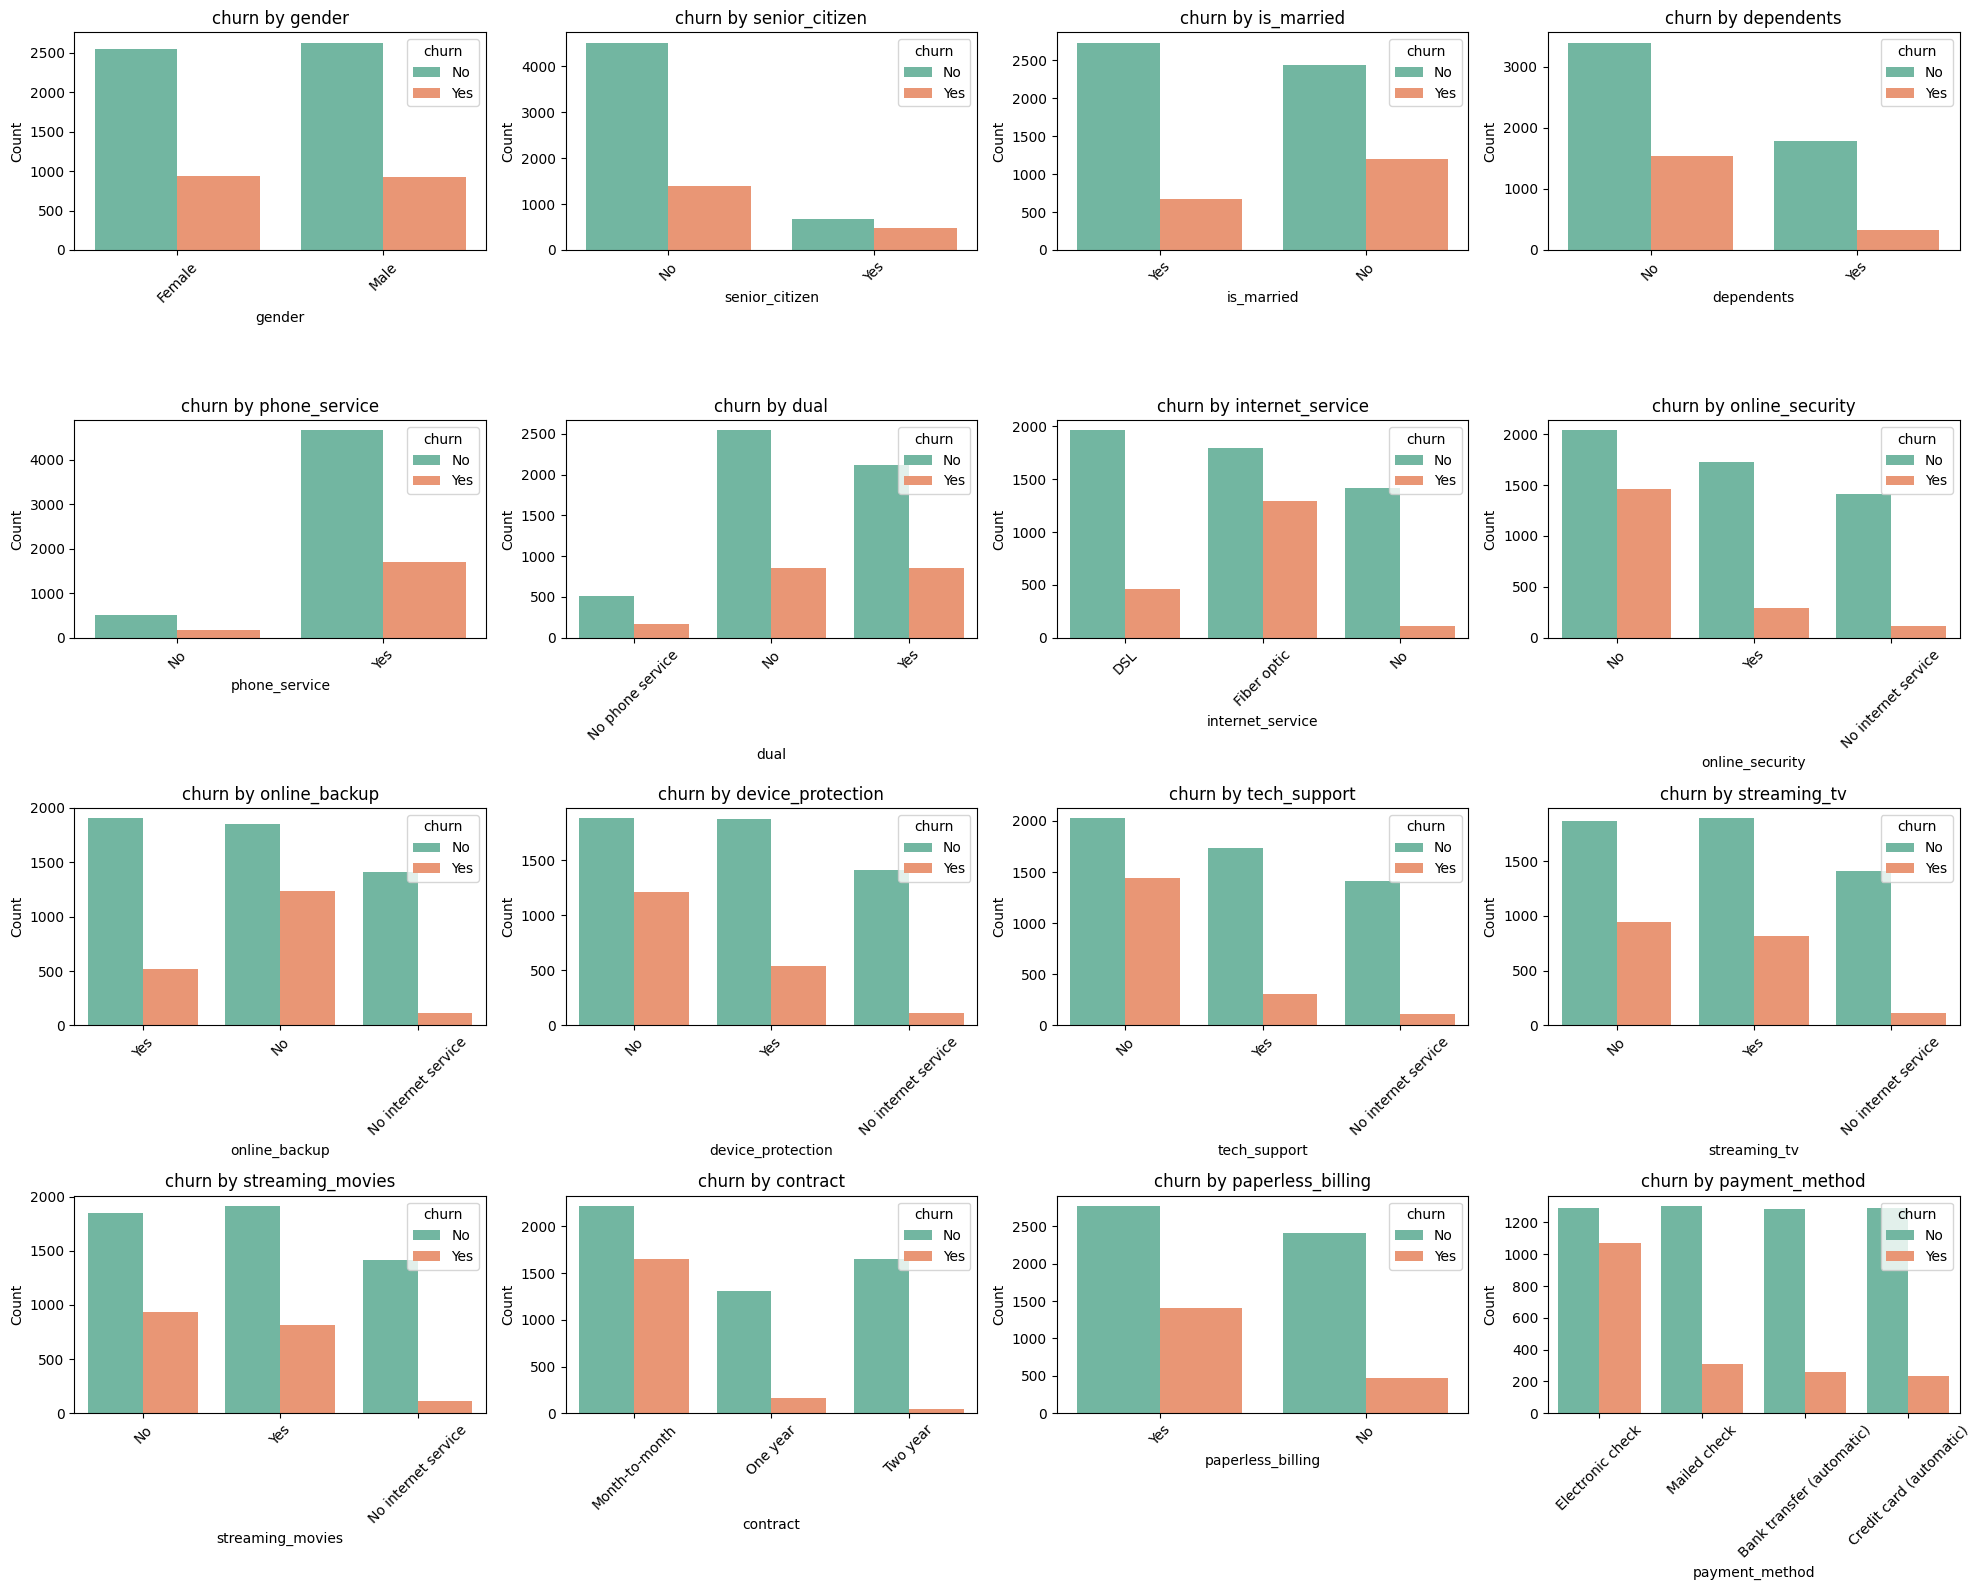

In [ ]:
# Selecting all categorical columns except CustomerId and Churn
cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features = [col for col in cat_features if col not in ['customer_id', 'churn']]

num_features = len(cat_features)
cols = 4
rows = (num_features + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, feature in enumerate(cat_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=feature, hue='churn', palette='Set2')
    plt.title(f'churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='churn', loc='upper right')

plt.tight_layout()
plt.show()

### Summary of Categorical Features Counts Grouped by Churn

* **Gender:** Nearly equal numbers of males and females churned and stayed, with a slight female majority in both groups.
* **Is\_Married:** Customers who are not married churn more than married ones.
* **Dependents:** Customers without dependents show higher churn compared to those with dependents.
* **Phone\_Service:** Majority have phone service; those without phone service have lower overall churn counts.
* **Dual Service:** Customers with dual service churn slightly less than those without; a separate "No phone service" group is evident.
* **Internet\_Service:** Fiber optic users show the highest churn count, followed by DSL users; customers with no internet service churn the least.
* **Online\_Security:** Customers without online security churn significantly more than those with it; a notable group has no internet service.
* **Online\_Backup, Device\_Protection, Tech\_Support:** In all, customers without these services churn more compared to those who have them; again, a no internet service group is consistent.
* **Streaming\_TV & Streaming\_Movies:** Customers streaming TV or movies churn less compared to those who do not stream; no internet service customers churn the least.
* **Contract:** Month-to-month contract holders have the highest churn rate by a large margin; one-year and two-year contracts show much lower churn.
* **Paperless\_Billing:** Customers with paperless billing churn more than those with paper bills.
* **Payment\_Method:** Customers paying via electronic check have the highest churn; bank transfers, credit cards, and mailed checks show lower churn counts.

In [ ]:
# Encoding 'Churn' to binary (target variable)
df['churn'] = df['churn'].map({'No': 0, 'Yes': 1})

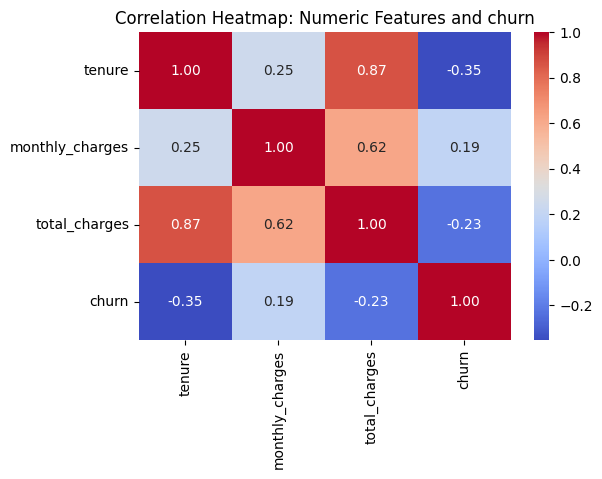

In [ ]:
# Numerical columns plus target
corr_columns = ['tenure', 'monthly_charges', 'total_charges', 'churn']

# Calculating correlation matrix
corr_matrix = df[corr_columns].corr()

# Plotting the Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Numeric Features and churn')
plt.show()

### Correlation Summary between Numerical Features and Churn

| Feature              | Correlation with Churn | Notes                                                                                        |
| -------------------- | ---------------------- | -------------------------------------------------------------------------------------------- |
| **tenure**           | **-0.35**              | Moderate negative correlation: longer tenure → less chance of churn.                         |
| **Monthly\_Charges** | **+0.19**              | Weak positive correlation: higher monthly charges → slightly higher churn risk.              |
| **Total\_Charges**   | **-0.23**              | Moderate negative correlation: higher total charges (longer customer lifetime) → less churn. |

* **Strong correlation observed between `tenure` and `Total_Charges` (0.87),** indicating total charges grow with tenure.
* These correlations suggest customers staying longer and with higher overall charges are less likely to churn, while those paying more monthly have a slightly increased churn risk.

# **4. Data Cleaning & Feature Engineering**

In [ ]:
# Printing unique values for each categorical feature
for col in cat_features:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}': {unique_vals}\n")

Unique values in 'gender': ['Female' 'Male']

Unique values in 'senior_citizen': ['No' 'Yes']

Unique values in 'is_married': ['Yes' 'No']

Unique values in 'dependents': ['No' 'Yes']

Unique values in 'phone_service': ['No' 'Yes']

Unique values in 'dual': ['No phone service' 'No' 'Yes']

Unique values in 'internet_service': ['DSL' 'Fiber optic' 'No']

Unique values in 'online_security': ['No' 'Yes' 'No internet service']

Unique values in 'online_backup': ['Yes' 'No' 'No internet service']

Unique values in 'device_protection': ['No' 'Yes' 'No internet service']

Unique values in 'tech_support': ['No' 'Yes' 'No internet service']

Unique values in 'streaming_tv': ['No' 'Yes' 'No internet service']

Unique values in 'streaming_movies': ['No' 'Yes' 'No internet service']

Unique values in 'contract': ['Month-to-month' 'One year' 'Two year']

Unique values in 'paperless_billing': ['Yes' 'No']

Unique values in 'payment_method': ['Electronic check' 'Mailed check' 'Bank transfer (automati

In [ ]:
# A List of internet-dependent columns
internet_dependent_cols = [
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies'
]

# Verifying that for customers with no internet service, all related internet-dependent features are marked as 'No internet service'
for col in internet_dependent_cols:
    mismatch = df[(df['internet_service'] == 'No') & (df[col] != 'No internet service')]
    print(f"Number of mismatches in '{col}' where internet_service='No' but value != 'No internet service': {len(mismatch)}")

Number of mismatches in 'online_security' where internet_service='No' but value != 'No internet service': 0
Number of mismatches in 'online_backup' where internet_service='No' but value != 'No internet service': 0
Number of mismatches in 'device_protection' where internet_service='No' but value != 'No internet service': 0
Number of mismatches in 'tech_support' where internet_service='No' but value != 'No internet service': 0
Number of mismatches in 'streaming_tv' where internet_service='No' but value != 'No internet service': 0
Number of mismatches in 'streaming_movies' where internet_service='No' but value != 'No internet service': 0


In [ ]:
for col in internet_dependent_cols:
    df[col] = df[col].replace('No internet service', 'No')

In [ ]:
# Printing unique values for each categorical feature
for col in cat_features:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}': {unique_vals}\n")

Unique values in 'gender': ['Female' 'Male']

Unique values in 'senior_citizen': ['No' 'Yes']

Unique values in 'is_married': ['Yes' 'No']

Unique values in 'dependents': ['No' 'Yes']

Unique values in 'phone_service': ['No' 'Yes']

Unique values in 'dual': ['No phone service' 'No' 'Yes']

Unique values in 'internet_service': ['DSL' 'Fiber optic' 'No']

Unique values in 'online_security': ['No' 'Yes']

Unique values in 'online_backup': ['Yes' 'No']

Unique values in 'device_protection': ['No' 'Yes']

Unique values in 'tech_support': ['No' 'Yes']

Unique values in 'streaming_tv': ['No' 'Yes']

Unique values in 'streaming_movies': ['No' 'Yes']

Unique values in 'contract': ['Month-to-month' 'One year' 'Two year']

Unique values in 'paperless_billing': ['Yes' 'No']

Unique values in 'payment_method': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



### Internet-Dependent Features and 'No Internet Service' Handling

* The dataset contains several internet-dependent features such as **Online\_Security**, **Online\_Backup**, **Device\_Protection**, **Tech\_Support**, **Streaming\_TV**, and **Streaming\_Movies**.
* These features have three unique values: `'Yes'`, `'No'`, and `'No internet service'`.
* Checking consistency showed that for all customers with **Internet\_Service** marked as `'No'`, the corresponding internet-dependent features are always `'No internet service'`.
* Since `'No internet service'` essentially means the feature is unavailable due to lack of internet, it is logically equivalent to `'No'` for these features.
* To simplify the dataset and reduce redundancy, the `'No internet service'` values were replaced with `'No'` in all internet-dependent columns.
* This unification will make encoding and modeling cleaner and easier.

# **5. Model Preparation**

In [ ]:
# Step 1: We will Separate features (X) and target (y)
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']

In [ ]:
churn_percentage = df['churn'].mean() * 100
print(f"Percentage of customers who churned: {churn_percentage:.2f}%")

Percentage of customers who churned: 26.54%


In [ ]:
from sklearn.model_selection import train_test_split

# Step 2: We will split the data before applying any standardization to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set churn distribution:\n{y_train.value_counts(normalize=True) * 100}")
print("\n------------------------------------------------------------------------------\n")
print(f"Test set churn distribution:\n{y_test.value_counts(normalize=True) * 100}")

Training set churn distribution:
churn
0    73.464679
1    26.535321
Name: proportion, dtype: float64

------------------------------------------------------------------------------

Test set churn distribution:
churn
0    73.456352
1    26.543648
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

label_encode_cols = [
    'gender', 'senior_citizen', 'is_married', 'dependents', 'phone_service', 'paperless_billing',
    'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]

onehot_encode_cols = [
    'dual', 'internet_service', 'contract', 'payment_method'
]

numerical_features = ['tenure', 'monthly_charges', 'total_charges']

# Step 3: Defining the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), label_encode_cols),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), onehot_encode_cols),
        ('scale', StandardScaler(), numerical_features)
    ],
    remainder='drop'
)

# Step 4: Fitting and transforming the features
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 5: Getting the new column names
ordinal_features = label_encode_cols
onehot_features = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_encode_cols)
all_features = list(ordinal_features) + list(onehot_features) + numerical_features

# Step 6: Creating the final processed DataFrame
X_train_processed = pd.DataFrame(X_train_processed, columns=all_features, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=all_features, index=X_test.index)

X_train_processed.head()

,gender,senior_citizen,is_married,dependents,phone_service,paperless_billing,online_security,online_backup,device_protection,tech_support,...,internet_service_Fiber optic,internet_service_No,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,tenure,monthly_charges,total_charges
3738,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.102371,-0.521976,0.163855
3151,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.711743,0.337478,-0.127367
4860,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.793155,-0.809013,-0.562421
3867,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.263980,0.284384,0.253945
3810,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.281624,-0.676279,-1.684161


In [ ]:
import joblib

# Save the preprocessor pipeline
joblib.dump(preprocessor, 'preprocessor_pipeline.joblib')

['preprocessor_pipeline.joblib']

# **6. Model Training**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.utils import class_weight

def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(6,5))
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix (%) - {model_name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes, rotation=0)
    plt.show()

def create_tf_mlp(input_dim, num_classes, hidden_units=[128, 64], dropout_rate=0.3):
    model = Sequential()

    # Input layer + first hidden layer
    model.add(Dense(hidden_units[0], activation='relu', input_shape=(input_dim,)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Additional hidden layers
    for units in hidden_units[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def train_and_evaluate(X_train, y_train, X_test, y_test, description="Original", epochs=100, batch_size=32):
    print(f"\n=== Training on {description} Data ===")
    trained_models = {}

    num_classes = len(np.unique(y_train))
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat = to_categorical(y_test, num_classes)

    class_weights_array = class_weight.compute_class_weight(class_weight='balanced',
                                                            classes=np.unique(y_train),
                                                            y=y_train)
    class_weights_dict = dict(enumerate(class_weights_array))

    pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

    class_names = [str(c) for c in np.unique(y_train)]

    global models

    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced'),
        'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
        'MLP_tensorflow': 'tensorflow',
        'XGBoost': XGBClassifier(
            n_estimators=200,
            max_depth=8,
            learning_rate=0.05,
            use_label_encoder=False,
            eval_metric='logloss',
            tree_method='gpu_hist',
            predictor='gpu_predictor',
            scale_pos_weight=pos_weight,
            random_state=42
        ),
        'LightGBM': LGBMClassifier(
            n_estimators=200,
            max_depth=8,
            learning_rate=0.05,
            scale_pos_weight=pos_weight,
            random_state=42
        ),
        'CatBoost': CatBoostClassifier(
            iterations=200,
            depth=8,
            learning_rate=0.05,
            scale_pos_weight=pos_weight,
            verbose=0,
            random_seed=42
        ),
        'KNN': KNeighborsClassifier(n_neighbors=7),
    }

    best_model_name = None
    best_f1 = 0

    for name, model in models.items():
        print(f"\nTraining {name}...")

        if model == 'tensorflow':
            tf_model = create_tf_mlp(X_train.shape[1], num_classes)
            tf_model.fit(X_train, y_train_cat,
                         epochs=epochs, batch_size=batch_size,
                         verbose=1, class_weight=class_weights_dict)
            trained_models[name] = tf_model

            loss, acc = tf_model.evaluate(X_test, y_test_cat, verbose=0)
            y_pred_prob = tf_model.predict(X_test)
            y_pred = np.argmax(y_pred_prob, axis=1)

            print(f"{name} - Test Accuracy: {acc:.4f}")
            print(classification_report(y_test, y_pred))
            plot_confusion_matrix(y_test, y_pred, class_names, name)

            f1 = f1_score(y_test, y_pred, average='weighted')
            print(f"{name} - Weighted F1 Score: {f1:.4f}")

        else:
            model.fit(X_train, y_train)
            trained_models[name] = model

            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            print(f"{name} - Test Accuracy: {acc:.4f}")
            print(classification_report(y_test, y_pred))
            plot_confusion_matrix(y_test, y_pred, class_names, name)

            f1 = f1_score(y_test, y_pred, average='weighted')
            print(f"{name} - Weighted F1 Score: {f1:.4f}")

        # Track best model by weighted F1
        if f1 > best_f1:
            best_f1 = f1
            best_model_name = name

        print('-' * 60)

    print(f"\nBest Model: {best_model_name} with Weighted F1 Score: {best_f1:.4f}")

    return trained_models

In [ ]:
from imblearn.combine import SMOTEENN

# Applying SMOTEENN instead of SMOTE
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_processed, y_train)


=== Training on SMOTEENN Data ===

Training LogisticRegression...
LogisticRegression - Test Accuracy: 0.7104
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1035
           1       0.47      0.86      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.71      0.73      1409



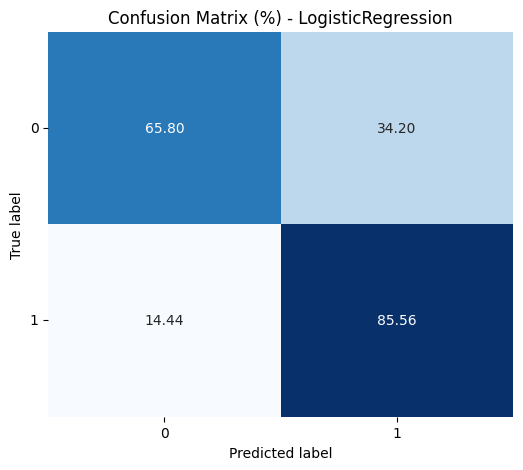

LogisticRegression - Weighted F1 Score: 0.7273
------------------------------------------------------------

Training RandomForest...
RandomForest - Test Accuracy: 0.7317
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.50      0.82      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409



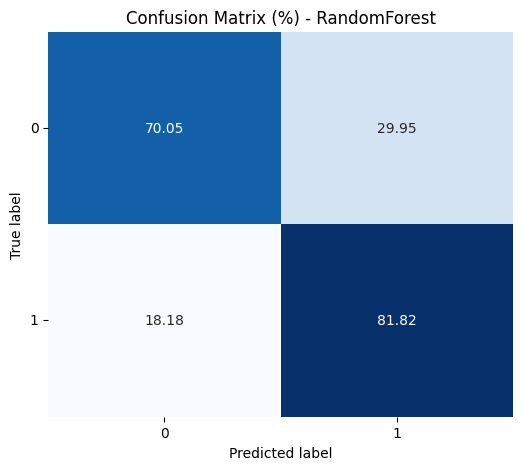

RandomForest - Weighted F1 Score: 0.7468
------------------------------------------------------------

Training BalancedRandomForest...
BalancedRandomForest - Test Accuracy: 0.7317
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1035
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



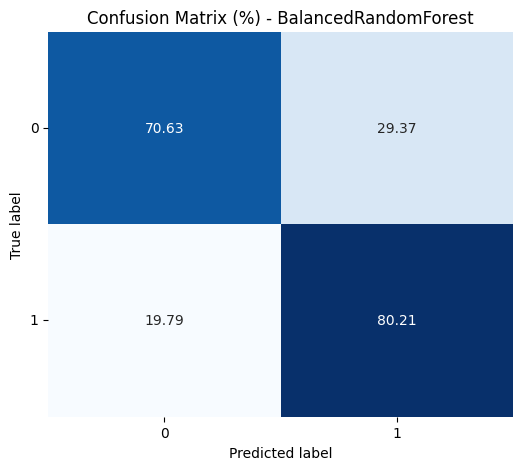

BalancedRandomForest - Weighted F1 Score: 0.7465
------------------------------------------------------------

Training MLP_tensorflow...
Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8217 - loss: 0.4218
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8911 - loss: 0.2765
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8909 - loss: 0.2678
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8979 - loss: 0.2422
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9141 - loss: 0.1979
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9127 - loss: 0.2044
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9128 - loss: 0.2086
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9203 - loss: 0.1884
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9261 - loss: 0.1840
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9309 - l

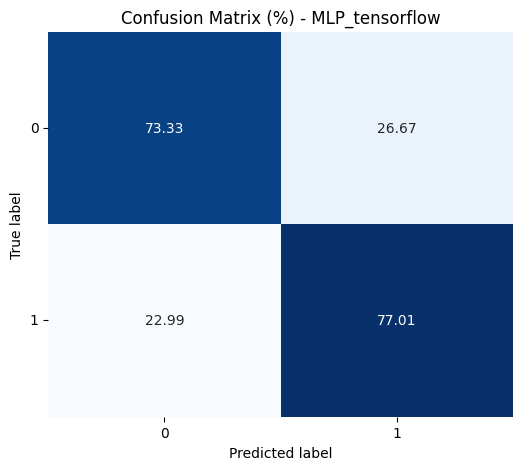

MLP_tensorflow - Weighted F1 Score: 0.7561
------------------------------------------------------------

Training XGBoost...
XGBoost - Test Accuracy: 0.7303
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.74      1409



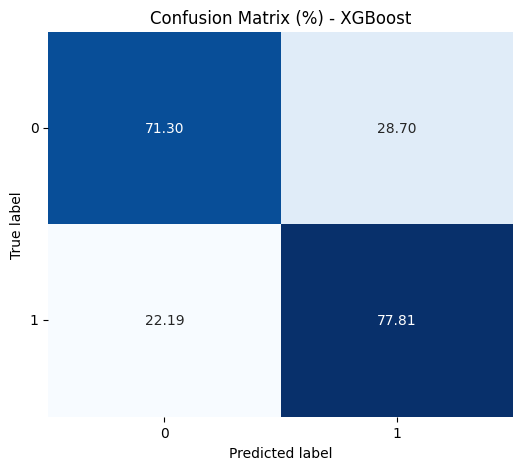

XGBoost - Weighted F1 Score: 0.7448
------------------------------------------------------------

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3035, number of negative: 2264
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1858
[LightGBM] [Info] Number of data points in the train set: 5299, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.572750 -> initscore=0.293078
[LightGBM] [Info] Start training from score 0.293078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

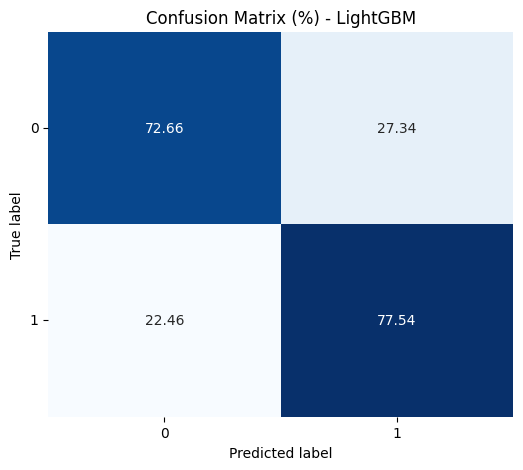

LightGBM - Weighted F1 Score: 0.7530
------------------------------------------------------------

Training CatBoost...
CatBoost - Test Accuracy: 0.7424
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



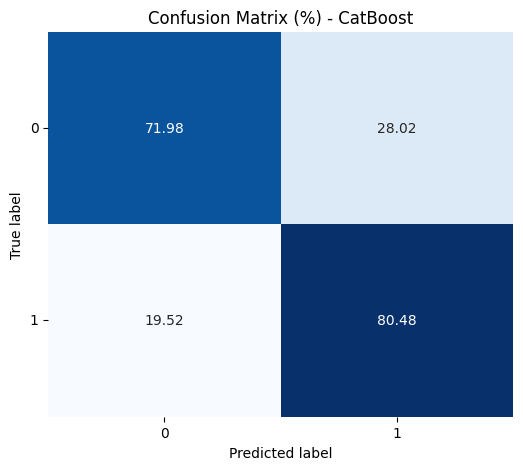

CatBoost - Weighted F1 Score: 0.7563
------------------------------------------------------------

Training KNN...
KNN - Test Accuracy: 0.6636
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1035
           1       0.43      0.88      0.58       374

    accuracy                           0.66      1409
   macro avg       0.68      0.73      0.65      1409
weighted avg       0.80      0.66      0.68      1409



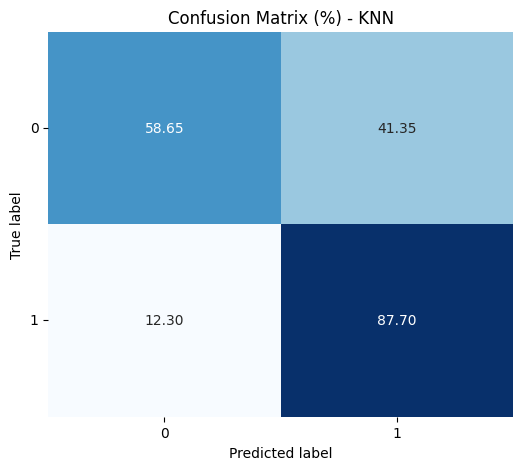

KNN - Weighted F1 Score: 0.6824
------------------------------------------------------------

Best Model: CatBoost with Weighted F1 Score: 0.7563


In [ ]:
trained_models_smoteenn = train_and_evaluate(X_train_resampled, y_train_resampled, X_test_processed, y_test, description="SMOTEENN")


=== Training on Normal Data ===

Training LogisticRegression...
LogisticRegression - Test Accuracy: 0.7438
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



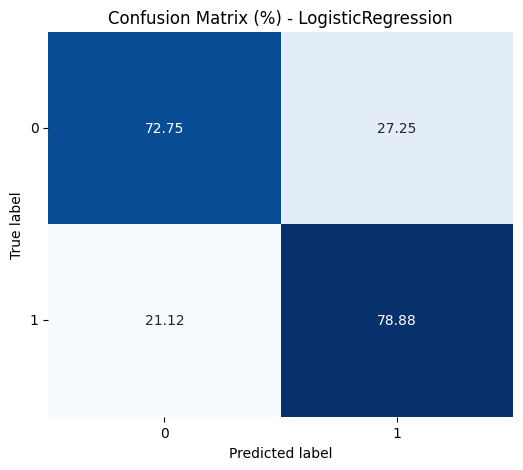

LogisticRegression - Weighted F1 Score: 0.7572
------------------------------------------------------------

Training RandomForest...
RandomForest - Test Accuracy: 0.7651
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409



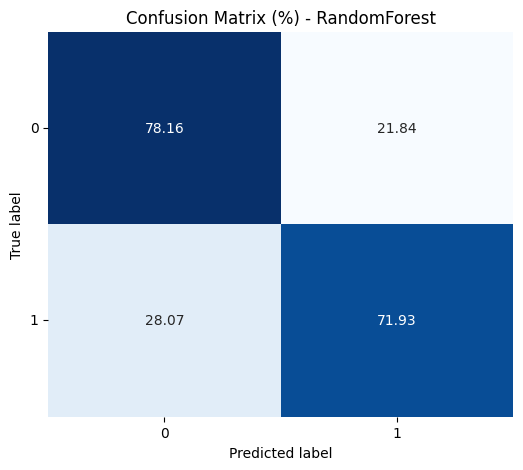

RandomForest - Weighted F1 Score: 0.7741
------------------------------------------------------------

Training BalancedRandomForest...
BalancedRandomForest - Test Accuracy: 0.7516
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



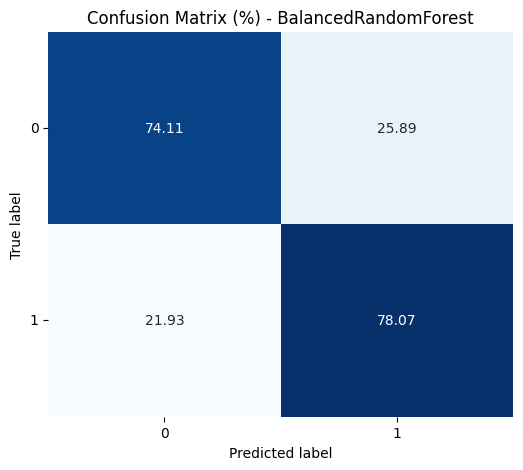

BalancedRandomForest - Weighted F1 Score: 0.7641
------------------------------------------------------------

Training MLP_tensorflow...
Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6515 - loss: 0.7154
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5424
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.5447
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7435 - loss: 0.5113
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7467 - loss: 0.5041
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7502 - loss: 0.4969
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7616 - loss: 0.4824
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7561 - loss: 0.4724
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7495 - loss: 0.4973
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7521 - los

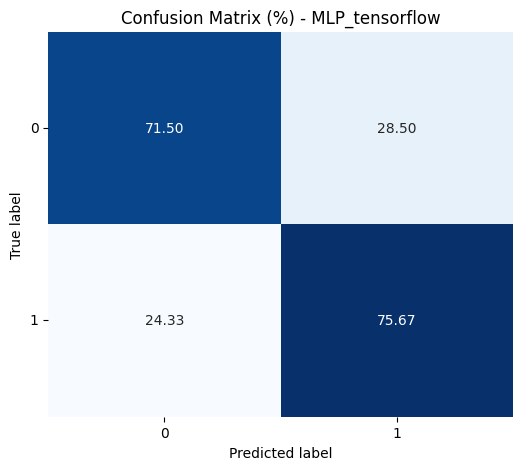

MLP_tensorflow - Weighted F1 Score: 0.7404
------------------------------------------------------------

Training XGBoost...
XGBoost - Test Accuracy: 0.7530
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.71      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



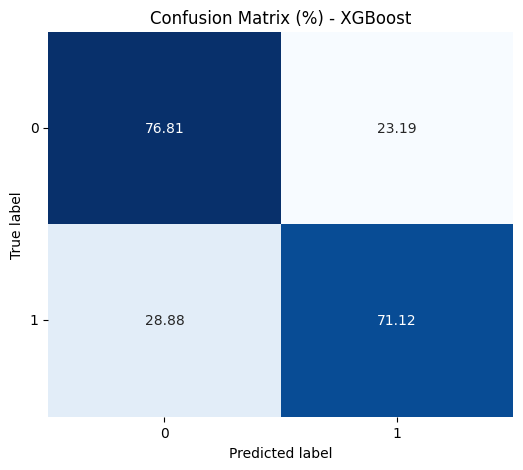

XGBoost - Weighted F1 Score: 0.7631
------------------------------------------------------------

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

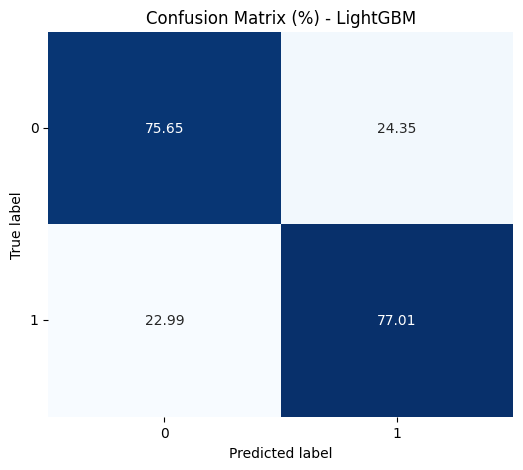

LightGBM - Weighted F1 Score: 0.7714
------------------------------------------------------------

Training CatBoost...
CatBoost - Test Accuracy: 0.7559
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



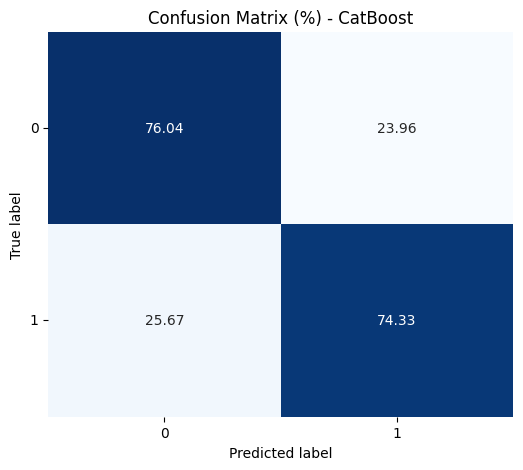

CatBoost - Weighted F1 Score: 0.7668
------------------------------------------------------------

Training KNN...
KNN - Test Accuracy: 0.7729
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.53      0.56       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



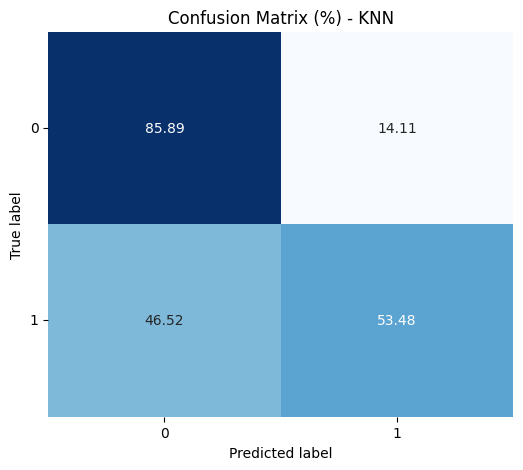

KNN - Weighted F1 Score: 0.7700
------------------------------------------------------------

Best Model: RandomForest with Weighted F1 Score: 0.7741


In [ ]:
trained_models = train_and_evaluate(X_train_processed, y_train, X_test_processed, y_test, description="Normal")

## Choice of Training Data: Normal Data vs. SMOTENN

We chose to train the model on the **normal (original) data** because the results were better compared to training on SMOTENN-processed data. The model showed improved overall performance metrics when trained on the original dataset.



=== Evaluating RandomForest with Custom Thresholds ===

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      1035
           1       0.46      0.87      0.60       374

    accuracy                           0.69      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.81      0.69      0.71      1409

Weighted F1 Score: 0.7119


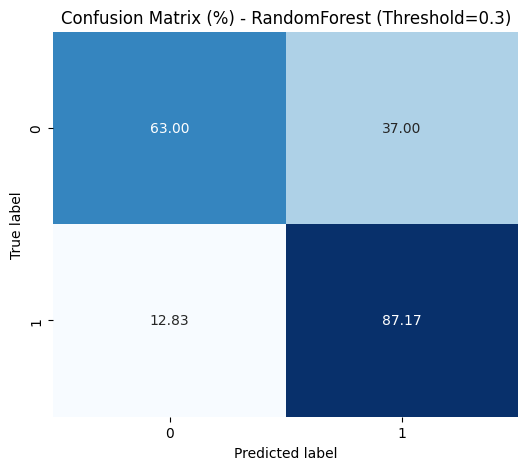


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.52      0.82      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

Weighted F1 Score: 0.7610


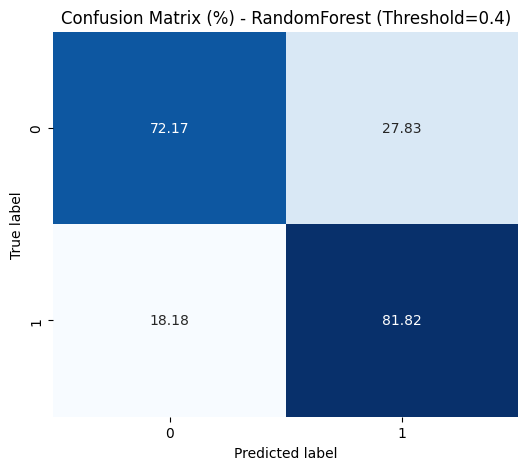


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409

Weighted F1 Score: 0.7741


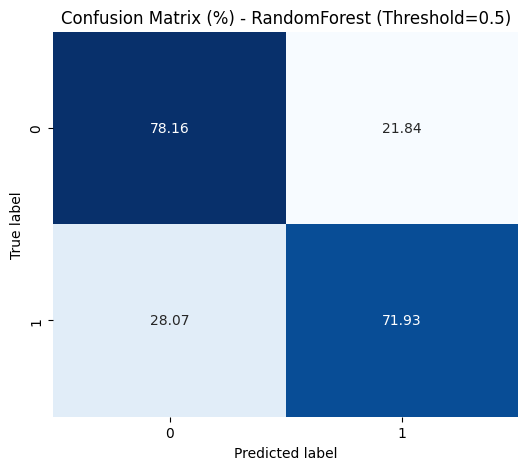


Threshold: 0.6
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.60      0.61       374

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Weighted F1 Score: 0.7928


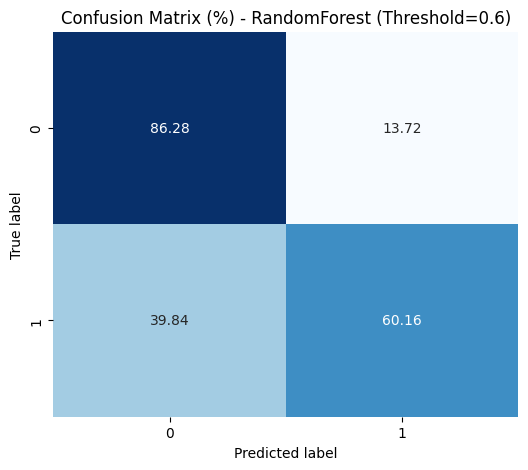


Threshold: 0.7
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.69      0.46      0.55       374

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Weighted F1 Score: 0.7874


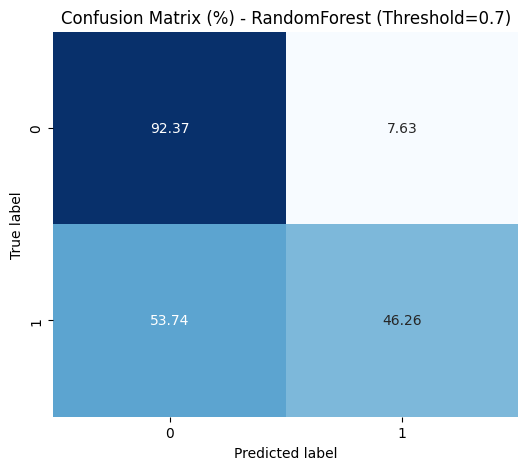


Threshold: 0.8
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1035
           1       0.76      0.29      0.42       374

    accuracy                           0.79      1409
   macro avg       0.77      0.63      0.64      1409
weighted avg       0.78      0.79      0.75      1409

Weighted F1 Score: 0.7494


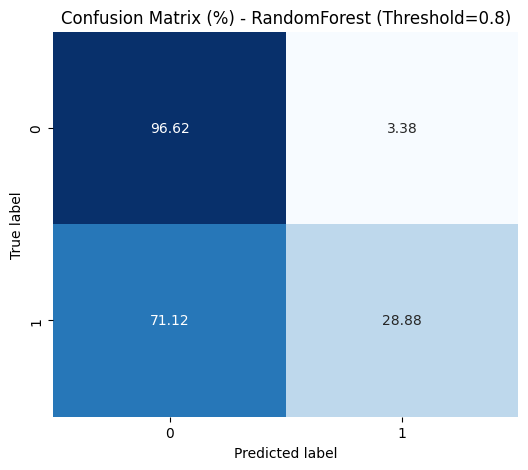


Threshold: 0.9
              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1035
           1       0.84      0.07      0.13       374

    accuracy                           0.75      1409
   macro avg       0.79      0.53      0.49      1409
weighted avg       0.77      0.75      0.66      1409

Weighted F1 Score: 0.6612


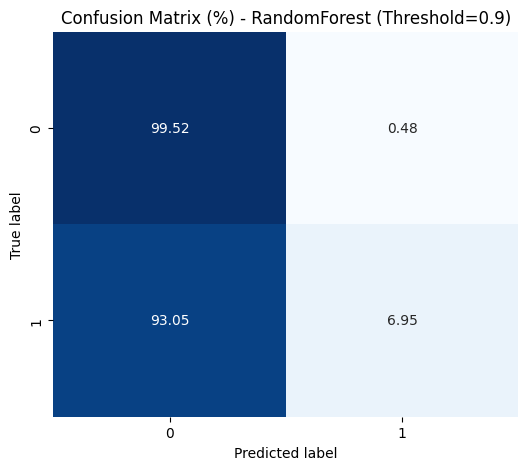


Best Threshold: 0.6 with Weighted F1 Score: 0.7928


In [ ]:
def evaluate_with_threshold(trained_models, X_test, y_test, model_name, thresholds=[0.5, 0.6, 0.7]):
    if model_name not in trained_models:
        print(f"Model '{model_name}' not found in trained models.")
        return

    model = trained_models[model_name]

    if model_name == 'MLP_tensorflow':
        y_proba = model.predict(X_test)
        y_proba = y_proba[:, 1]  # Probability for class 1
    else:
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            print(f"{model_name} does not support probability prediction.")
            return

    print(f"\n=== Evaluating {model_name} with Custom Thresholds ===")
    best_threshold = None
    best_f1 = 0
    best_y_pred = None

    classes = np.unique(y_test).astype(str)

    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"\nThreshold: {threshold}")
        print(classification_report(y_test, y_pred))
        print(f"Weighted F1 Score: {f1:.4f}")

        # Confusion matrix normalized by row (percentage)
        cm = confusion_matrix(y_test, y_pred)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap='Blues', cbar=False,
                    xticklabels=classes, yticklabels=classes)
        plt.title(f'Confusion Matrix (%) - {model_name} (Threshold={threshold})')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            best_y_pred = y_pred

    print(f"\nBest Threshold: {best_threshold} with Weighted F1 Score: {best_f1:.4f}")

evaluate_with_threshold(trained_models, X_test_processed, y_test, model_name='RandomForest', thresholds=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

## Threshold Selection Summary for RandomForest Model

After evaluating different classification thresholds, **0.5** and **0.6** stand out as the best choices based on overall performance metrics:

### Key Points:
- **Threshold 0.6** offers the highest weighted F1 score and a balanced trade-off between precision and recall for both classes.
- **Threshold 0.5** provides slightly better recall for the minority class (class 1), with very competitive overall performance.
- Both thresholds ensure good accuracy and balanced class-wise performance, making them preferable over others.


# **7. Saving the Model for Deployment**

In [ ]:
# Saving the best Model (RandomForest model)
joblib.dump(trained_models['RandomForest'], 'RandomForest_model.pkl')

['RandomForest_model.pkl']